# Results of Simulating Bessel and Laguerre Diffusions
We will start from simulating continuous Bessel diffusions using 4 algorithms. And we will proceed to continuous Laguerre processes using 2 algorithms. Results as tables and plots are provided.
## Simulating Continuous Bessel Diffusions
We will use 4 algorithms:
- By simulating discrete Bessel (through a Poisson kernel)
- By simulating discrete Laguerre and time change
- By simulating discrete Bessel with delay
- By simulating discrete Laguerre with delay

See the draft for more detailed explanation. All plots below could be made as subplots in one figure once we decide what to report.


In [1]:
from BD_simulator import MC_BESQ_gateway, MC_Laguerre_gateway, exact_BESQ, exact_Laguerre, MC_dBESQ_gateway, MC_Laguerre
import numpy as np
import time
# J: Bessel function
from scipy.special import jv as J
# L: Laguerre polynomial
from scipy.special import  eval_laguerre as L
from math import comb
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

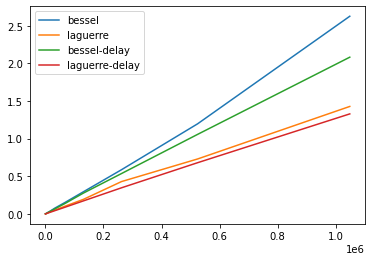

In [2]:
t = 5
x0 = 5
avg_runtime = []
BESQ_value = exact_BESQ(t = t, x0 = x0)
for method in ['bessel', 'laguerre', 'bessel-delay', 'laguerre-delay']:
    avg_runtime = []
    for log_num_path in range(5, 21):
        num_paths = 2 ** log_num_path
        time_list = []
        for _ in range(10):
            start = time.time()
            dBESQ_estimate = MC_BESQ_gateway(N = num_paths, t = t, x0 = x0, test = 'bessel', method = method)
            run_time = time.time() - start
            time_list.append(run_time)
        avg_runtime.append(np.mean(time_list))
    plt.plot(2 ** np.arange(5,21), avg_runtime, label=method)

plt.legend()
plt.show()


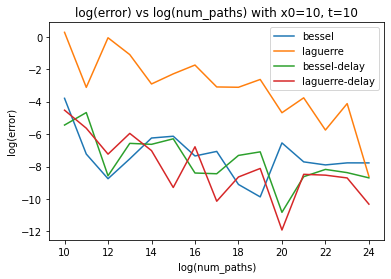

In [3]:
t = 10
x0 = 10
avg_runtime = []
BESQ_value = exact_BESQ(t = t, x0 = x0, num_decimal=100)
for method in ['bessel', 'laguerre', 'bessel-delay', 'laguerre-delay']:
    error_list = []
    for log_num_path in range(10, 25):

        num_paths = 2 ** log_num_path
        dBESQ_estimate = MC_BESQ_gateway(N = num_paths, t = t, x0 = x0, test = 'bessel', method = method, num_decimal=100)
        error = abs(dBESQ_estimate - BESQ_value)
        error_list.append(np.log(error))

    plt.plot(np.arange(10,25), error_list, label=method)

plt.title('log(error) vs log(num_paths) with x0=10, t=10')
plt.xlabel('log(num_paths)')
plt.ylabel('log(error)')
plt.legend()
plt.show()

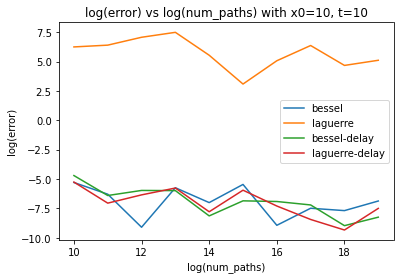

In [4]:
t = 30
x0 = 10
avg_runtime = []
BESQ_value = exact_BESQ(t = t, x0 = x0, num_decimal=100)
for method in ['bessel', 'laguerre', 'bessel-delay', 'laguerre-delay']:
    error_list = []
    for log_num_path in range(10, 20):

        num_paths = 2 ** log_num_path
        dBESQ_estimate = MC_BESQ_gateway(N = num_paths, t = t, x0 = x0, test = 'bessel', method = method, num_decimal=100)
        error = abs(dBESQ_estimate - BESQ_value)
        error_list.append(np.log(error))

    plt.plot(np.arange(10,20), error_list, label=method)

plt.title('log(error) vs log(num_paths) with x0=10, t=10')
plt.xlabel('log(num_paths)')
plt.ylabel('log(error)')
plt.legend()
plt.show()

### Time taken to simulate one path for different t, fixed x0

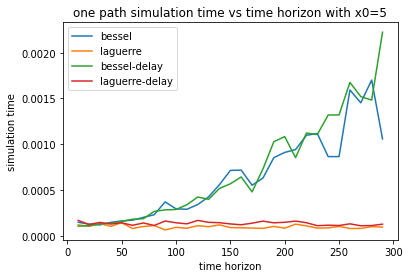

In [5]:
x0 = 5
avg_runtime = []

for method in ['bessel', 'laguerre', 'bessel-delay', 'laguerre-delay']:
    avg_runtime = []
    for t in range(10,300, 10):
        BESQ_value = exact_BESQ(t = t, x0 = x0)
        time_list = []
        for _ in range(10):
            start = time.time()
            dBESQ_estimate = MC_BESQ_gateway(N = 1, t = t, x0 = x0, test = 'bessel', method = method)
            run_time = time.time() - start
            time_list.append(run_time)
        avg_runtime.append(np.mean(time_list))
    plt.plot(np.arange(10,300,10), avg_runtime, label=method)

plt.title('one path simulation time vs time horizon with x0=5')
plt.xlabel('time horizon')
plt.ylabel('simulation time')
plt.legend()
plt.show()


### Error for different t, fixed x0 and fixed num_paths

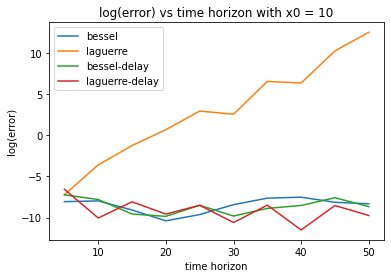

In [6]:
x0 = 10
num_paths = 10 ** 6
avg_runtime = []
BESQ_value = exact_BESQ(t = t, x0 = x0, num_decimal=100)
for method in ['bessel', 'laguerre', 'bessel-delay', 'laguerre-delay']:
    error_list = []
    for t in range(5, 55, 5):

        dBESQ_estimate = MC_BESQ_gateway(N = num_paths, t = t, x0 = x0, test = 'bessel', method = method, num_decimal=100)
        error = abs(dBESQ_estimate - BESQ_value)
        error_list.append(np.log(error))

    plt.plot(np.arange(5,55,5), error_list, label=method)

plt.title('log(error) vs time horizon with x0 = 10')
plt.xlabel('time horizon')
plt.ylabel('log(error)')
plt.legend()
plt.show()

### Error for different x0, fixed t

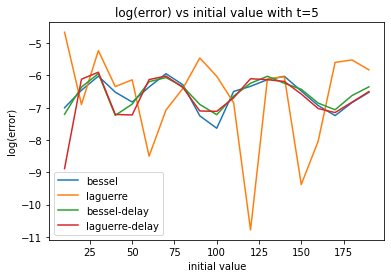

In [7]:
t = 5
num_paths = 10 ** 6
avg_runtime = []
BESQ_value = exact_BESQ(t = t, x0 = x0, num_decimal=100)
for method in ['bessel', 'laguerre', 'bessel-delay', 'laguerre-delay']:
    error_list = []
    for x0 in range(10, 200, 10):

        dBESQ_estimate = MC_BESQ_gateway(N = num_paths, t = t, x0 = x0, test = 'bessel', method = method, num_decimal=100)
        error = abs(dBESQ_estimate - BESQ_value)
        error_list.append(np.log(error))

    plt.plot(np.arange(10,200,10), error_list, label=method)

plt.title('log(error) vs initial value with t=5')
plt.xlabel('initial value')
plt.ylabel('log(error)')
plt.legend()
plt.show()

## Simulating Continuous Laguerre Diffusions
We have two possible algorithms for

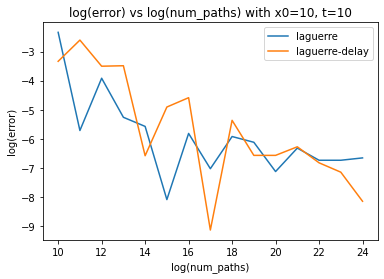

In [8]:
t = 10
x0 = 10
n = 1
avg_runtime = []
Laguerre_value = exact_Laguerre(t=t, x0=x0, n=n, num_decimal=100)
for method in ['laguerre', 'laguerre-delay']:
    error_list = []
    for log_num_path in range(10, 25):

        num_paths = 2 ** log_num_path
        dLaguerre_estimate = MC_Laguerre_gateway(N = num_paths, t = t, x0 = x0, test = 'laguerre', method = 'laguerre', args = {'n': n})
        error = abs(dLaguerre_estimate - Laguerre_value)
        error_list.append(np.log(error))

    plt.plot(np.arange(10,25), error_list, label=method)

plt.title('log(error) vs log(num_paths) with x0=10, t=10')
plt.xlabel('log(num_paths)')
plt.ylabel('log(error)')
plt.legend()
plt.show()

#### Method `laguerre-delay` can simulate for any $L^2$ functions
But we do not have the exact value?

In [9]:
# t = 10
# x0 = 10
# n = 1
# method = 'laguerre-delay'
# error_list = []
#
# for log_num_path in range(10, 25):
#
#     num_paths = 2 ** log_num_path
#     dLaguerre_estimate = MC_Laguerre_gateway(N = num_paths, t = t, x0 = x0, test = 'relu', method = 'laguerre', args = {'n': n})
#     error = abs(dLaguerre_estimate - Laguerre_value)
#     error_list.append(np.log(error))
#
# plt.plot(np.arange(10,25), error_list, label=method)
#
# plt.title('log(error) vs log(num_paths) with x0=10, t=10')
# plt.xlabel('log(num_paths)')
# plt.ylabel('log(error)')
# plt.legend()
# plt.show()

# Solving PDE via Gateway
## Set-Up
Consider the following PDE:
$$
\frac{du}{dt}(t, x) = x \frac{d^2u}{dx^2}(t, x) + \frac{du}{dx}(t, x)
$$
$$
u(0, x) = F(x)
$$
which by Feynman-Kac corresponds to the following probabilistic presentation:
$$
u(t, x) = \mathbb E[F(X_t)|X_0 = x]
$$
where $X$ follows a squared-Bessel diffusion.

## Gateway through a Difference Equation
We have the following gateway relation:
$$u(t, x) = \mathbb E[v(t, Pois(x)]$$
Where for $v(t,n)$ we have the following PDE:
$$\frac{dv(t,n)}{dt} = \mathbb Gv(t,n) := (n+1)v(t,n+1) + nv(t,n) - (2n+1)v(t,n)$$
where the LHS could be discretized as: $\frac{v(t+\Delta t, n)-v(t,n)}{\Delta t}$ (explicit scheme). This leads to the following:
$$
(v(t+\Delta t, 0), \dots, v(t+\Delta t,N))' = K(v(t, 0), \dots, v(t,N))'
$$
where
$$
K = \begin{bmatrix}
1-\Delta t & \Delta t & 0 &\cdots & 0 \\
\Delta t & 1-3\Delta t & 2\Delta t & \cdots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
\cdots & k\Delta t & 1 - (2k+1)\Delta t & (k+1)\Delta t & \cdots\\
0 & \cdots & \cdots & N\Delta t & 1-(2N+1)\Delta t
\end{bmatrix}
$$
$K$ is sparse (tridiagonal) matrix so the matrix multiple is much faster.

### Choice of $N$
For fixed $x$, we sample enough copies of $Pois(x)$ and let $L$ be the maximum among copies. Then we could choose $N$ as $\alpha L$ with some fixed $\alpha \in \mathbb Z^+$. Here we use $\alpha = 2$, and we require $N$ to be at least $100$.

### Experiment
We use the eigen function Bessel function for experiment. Let us fix the time horizon as $T=10$.

### When dt is small:
Here $dt$ is the time step-size. At for the following experiment we have $dt = 10^{-5}$. And the result shows that it converges well to the true value.

In [10]:
from scipy.sparse import diags
import numpy as np
from scipy.special import  eval_laguerre as L
from scipy.special import jv as J

x0 = 3
C = 10 ** 6
initial = np.random.poisson(x0, C)
N = max(np.max(initial)*2, 100)

T = 10
M = 10000
dt = T / M
entries = [1-(np.arange(N+1)*2+1)*dt, np.arange(1,N+1)*dt, np.arange(1,N+1)*dt]
kernel = diags(entries, offsets=[0, 1, -1])
solution = np.zeros((M+1,N+1))

# C = L(N+1, 1)
solution[0, :] = L(np.arange(N+1), 1)
for t in range(1, M+1):
    solution[t, :] = kernel @ solution[t-1, :]
    # solution[t, -1] += (N+1) * dt * C

est = np.mean(solution[-1,initial])
print('estimated value:',est)

act = np.exp(-T) * J(0, 2*np.sqrt(x0))
print('actual value: ', act)

print(f'absolute error is: {np.abs(act-est): .5f}')
# print(f'relative error is: {100 * np.abs(act-est) / np.abs(act): .3f}%')

estimated value: -9.263118747940991e-05
actual value:  -1.7021612079578745e-05
absolute error is:  0.00008


### A plot of $v(t,10)$ as a function in time
It turned out to be a smooth function in time.

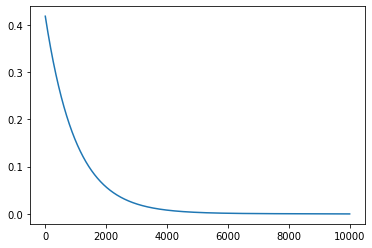

In [11]:
plt.plot(solution[:,10])

## When $dt$ is large
On the other hand, if the $dt$ term is large, we run into problems. For example if $dt=0.01$

In [12]:
from scipy.sparse import diags
import numpy as np
from scipy.special import  eval_laguerre as L
from scipy.special import jv as J

x0 = 3
C = 10 ** 6
initial = np.random.poisson(x0, C)
N = max(np.max(initial)*2, 100)

T = 10
M = 1000
dt = T / M
entries = [1-(np.arange(N+1)*2+1)*dt, np.arange(1,N+1)*dt, np.arange(1,N+1)*dt]
kernel = diags(entries, offsets=[0, 1, -1])
solution = np.zeros((M+1,N+1))

# C = L(N+1, 1)
solution[0, :] = L(np.arange(N+1), 1)
for t in range(1, M+1):
    solution[t, :] = kernel @ solution[t-1, :]
    # solution[t, -1] += (N+1) * dt * C

est = np.mean(solution[-1,initial])
print('estimated value:',est)

act = np.exp(-T) * J(0, 2*np.sqrt(x0))
print('actual value: ', act)

print(f'absolute error is: {np.abs(act-est): .5f}')
# print(f'relative error is: {100 * np.abs(act-est) / np.abs(act): .3f}%')

estimated value: nan
actual value:  -1.7021612079578745e-05
absolute error is:  nan


### A plot of $v(t,10)$ as a function in time
It turned out to be an expnantially growing function.

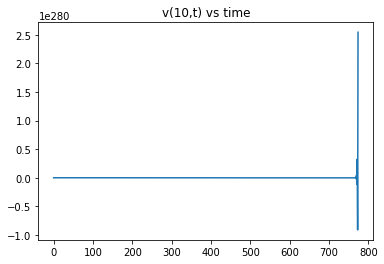

In [13]:
plt.plot(solution[:,10])
plt.title('v(10,t) vs time')
plt.show()

***Plot below showing exponential growth***

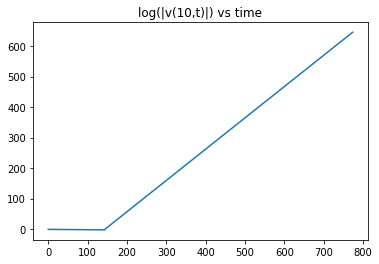

In [14]:
plt.plot(np.log(np.abs(solution[:,10])))
plt.title('log(|v(10,t)|) vs time')
plt.show()

Finally, there seems to be a dichotomy: the scheme transition almost immediately from converging well to being explosive.